<h2> Forecasting stock movements, trading signals, exercise 1 B</h2>

In this exercise, we test whether it is possile to obtain accurate trading signals using market data and some besic classifiers. As features, we use data calculated from historical stock prices and trading volumes. The trading strategy is: based on the features, if the classifier give us 1 / -1, we buy/sell the stock.

Data selection: 

1. We choose a stock, a time span, and download the corresponding price and volume data from Yahoo Finance. 
2. We analyse the data with candlesticks, statistical indicators and a heatmap of mutual correlations.

Feature selection: 

3. We choose features that could contain information on the future price movements of the stock.
Such features could be Close-Open price, High-Low price, trading volume, moving/rolling average, exponentially moving average, RSI relative strength index.

Classification:

4. We split the data into train set and test set. We set X as a matrix of the features values. The output variable y tells us whether the stock price has risen or fallen.  

5. We choose 4 common classifiers, namely KNN, random forest, linear regressor and SVC support vector classifier. Based on X and y, we compute the corresponding hit rates and confusion matrices. NOTE: Random forest does not work if y is a dataframe df. Y should be an np. 

6. We choose one of the classifiers and compute how much profit or loss one would have done with the trading strategy described above. 



3 credit version of the course: you can do the exercise once with the given data SPY (S&P index data).

5 credit version of the course: Repeat the exercise with some other data than SPY. Try with different time lags and combinations of the features used. Does this affect the result? You can also try different classifiers in the last part of the exercise, when comparing the cumulative stock log-returns and strategy log-return. 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import mplfinance as mpl

import seaborn as sb

# Machine learning libraries
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


<h4>Selecting data

Select the stock and timeframe you want. You can try to select a period of time when stock prices have been fairly stationary. You should use the company share name (AAPL, TSLA etc) when downloading the data. 

In [2]:
df = yf.download('SPY', start="2015-01-01", end="2020-01-10")       
df = df.dropna()
df = df[['Open', 'High', 'Low','Close', 'Volume']]
df.columns = df.columns.droplevel(1)

df.size,df.tail()

[*********************100%***********************]  1 of 1 completed


(6320,
 Price             Open        High         Low       Close    Volume
 Date                                                                
 2020-01-03  294.299248  296.571839  294.244268  295.444702  77709700
 2020-01-06  293.685302  296.654338  293.566170  296.571869  55653900
 2020-01-07  296.003732  296.480259  295.288969  295.738007  40496400
 2020-01-08  295.930430  298.532899  295.683022  297.314148  68296000
 2020-01-09  298.881069  299.403403  298.294583  299.330078  48473300)

<h4>Data analysis

Plot candlesticks of the 50 first data points, with moving averages mav=(3,6,9).

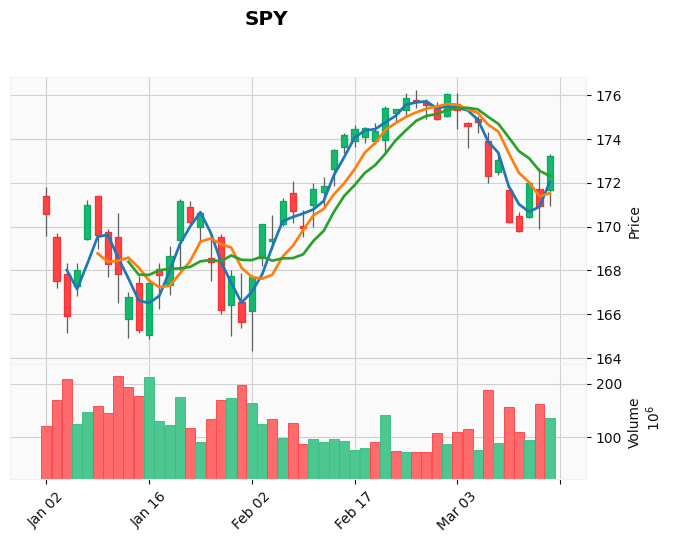

In [3]:

mpl.plot(
    df.head(50),
    type='candle',
    volume=True,
    mav=(3, 6, 9),
    style='yahoo',
    title='SPY',
    ylabel='Price',
    ylabel_lower='Volume'
)


<h4>Feature selection

First compute three variables from the data obtained:  the difference between Open and Close (Open minus Close), High-Low and the percentage change in the volume. 
Then, add these as columns to the dataframe df. Now, the columns of the df are Open, High, L
ow, Close, Open-Close, High-Low, VolumeChange.


In [4]:
# Predictor variables; fill below
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High-df.Low
df['VolumeChange'] = df.Volume.pct_change()
df =df.dropna()

Use df.describe() for some statistical indicators of your data.

In [5]:
df.reset_index(inplace=True)
df.describe()

Price,Date,Open,High,Low,Close,Volume,Open-Close,High-Low,VolumeChange
count,1263,1263.000000,1263.000000,1263.000000,1263.000000,1.263000e+03,1263.000000,1263.000000,1263.000000
mean,2017-07-07 00:26:13.396674560,214.936421,215.861068,213.893869,214.961327,9.302841e+07,-0.024906,1.967199,0.061131
min,2015-01-05 00:00:00,154.540157,156.031833,152.881622,154.980881,2.027000e+07,-9.182191,0.280992,-0.639872
25%,2016-04-06 12:00:00,176.812827,177.370301,176.043601,176.807922,6.134810e+07,-0.712115,1.073415,-0.203325
50%,2017-07-07 00:00:00,212.372467,213.037348,211.804566,212.367859,8.064600e+07,-0.062034,1.550482,0.001806
75%,2018-10-06 12:00:00,247.240838,247.676678,245.860140,246.767258,1.104306e+08,0.539552,2.369185,0.237547
max,2020-01-09 00:00:00,298.881069,299.403403,298.294583,299.330078,5.072443e+08,9.161078,12.639557,2.360032
std,NaN,37.337408,37.419701,37.217995,37.324545,4.729715e+07,1.463045,1.432310,0.390150


Compute the mutual correlations (Pearson) of the dataframe and plot them in a heatmap. 

In [6]:
# fill in below
corr = df.corr('pearson')

<Axes: xlabel='Price', ylabel='Price'>

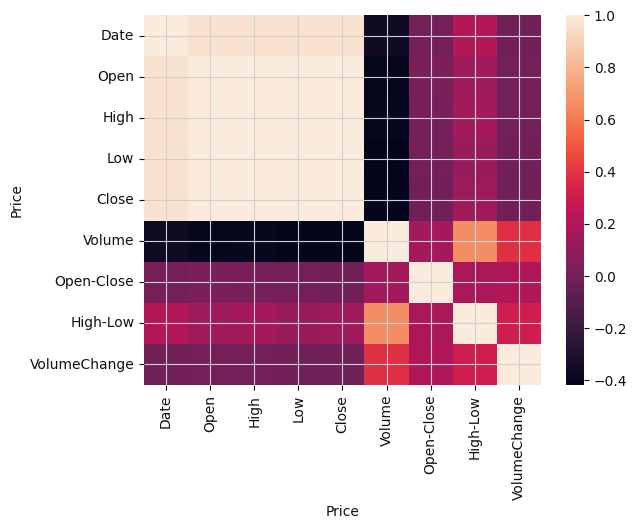

In [7]:
    # fill in below
sb.heatmap(corr)
#pearson only capture linear relationship

Have a look at the heatmap. The correlation between volume and price is negative. The correlation between volume and 'high-low' is positive.  Can you say something about these correlations?
The correlation between volume and 'open-close' is weakly positive. Does this tell anything about the market's trend?

There is no correlation (an anti-correlation) between volume and price because it can be huge volume of transaction on the sell side so the price is decreasing and the volume are moving up. The Correlation between volume and high low is positive because high volume means the prices changes the lot during the day, so it is more likely to have a huge gap between the lowest price and the highest. High volume leads to high volatility of the market.

The slightly positive correlation between volume and open-close means that there are slighy more transaction and activity during the days of rise or fall of price.

<h4> Choosing features

We start by choosing suitable features.
We already have 3 possible predictor variables: Open-Close, High-Low and VolumeChange.

We are interested in a couple of other features, namely moving average (rolmean), the exponential moving average (ewa) and RSI. We compute them from the closing prices. Complete rolmean and ewa below. 


0       167.508789
1       167.358528
2       167.419500
3       167.758587
4       167.934891
           ...    
1258    292.082825
1259    292.510353
1260    292.817749
1261    293.245977
1262    293.825416
Name: Close, Length: 1263, dtype: float64

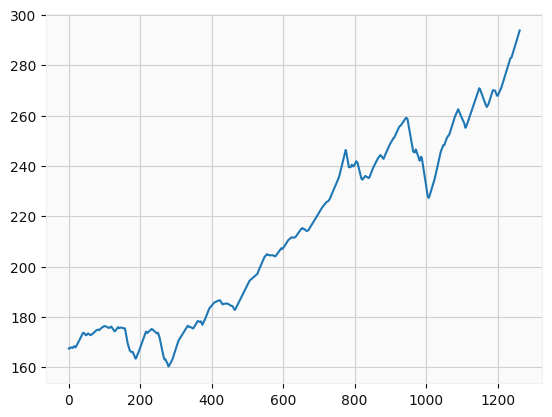

In [8]:
#fill in below
rolmean=df['Close'].rolling(window=20).mean()
ewa=df['Close'].ewm(span=20,adjust=False).mean()
plt.plot(ewa)
ewa


Next, we compute RSI, the relative strenght index.  https://en.wikipedia.org/wiki/Relative_strength_index
If you need help, you can find Python code for calculating the RSI on the internet. If you are not able to calculate the RSI, you can do this exercise without it.  

In [9]:
Y = df["Close"].diff()
Y.dropna(inplace=True)

In [10]:
change_up = Y.copy()
change_down = Y.copy()

change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(15).mean()
avg_down = change_down.rolling(15).mean().abs()


In [11]:
rsi = 100 * avg_up / (avg_up + avg_down)

Add 'Rolmean', 'EWA' and 'RSI' in the dataframe df.

In [12]:
# fill below
df['Rolmean']=rolmean
df['EWA']=ewa
df['RSI']=rsi
df=df.dropna()

In [13]:
plt.style.use('fivethirtyeight')

# Make our resulting figure much bigger
plt.rcParams['figure.figsize'] = (20, 20)

You can plot the RSI with two horizontal lines, signalling sell (70) and buy (30).

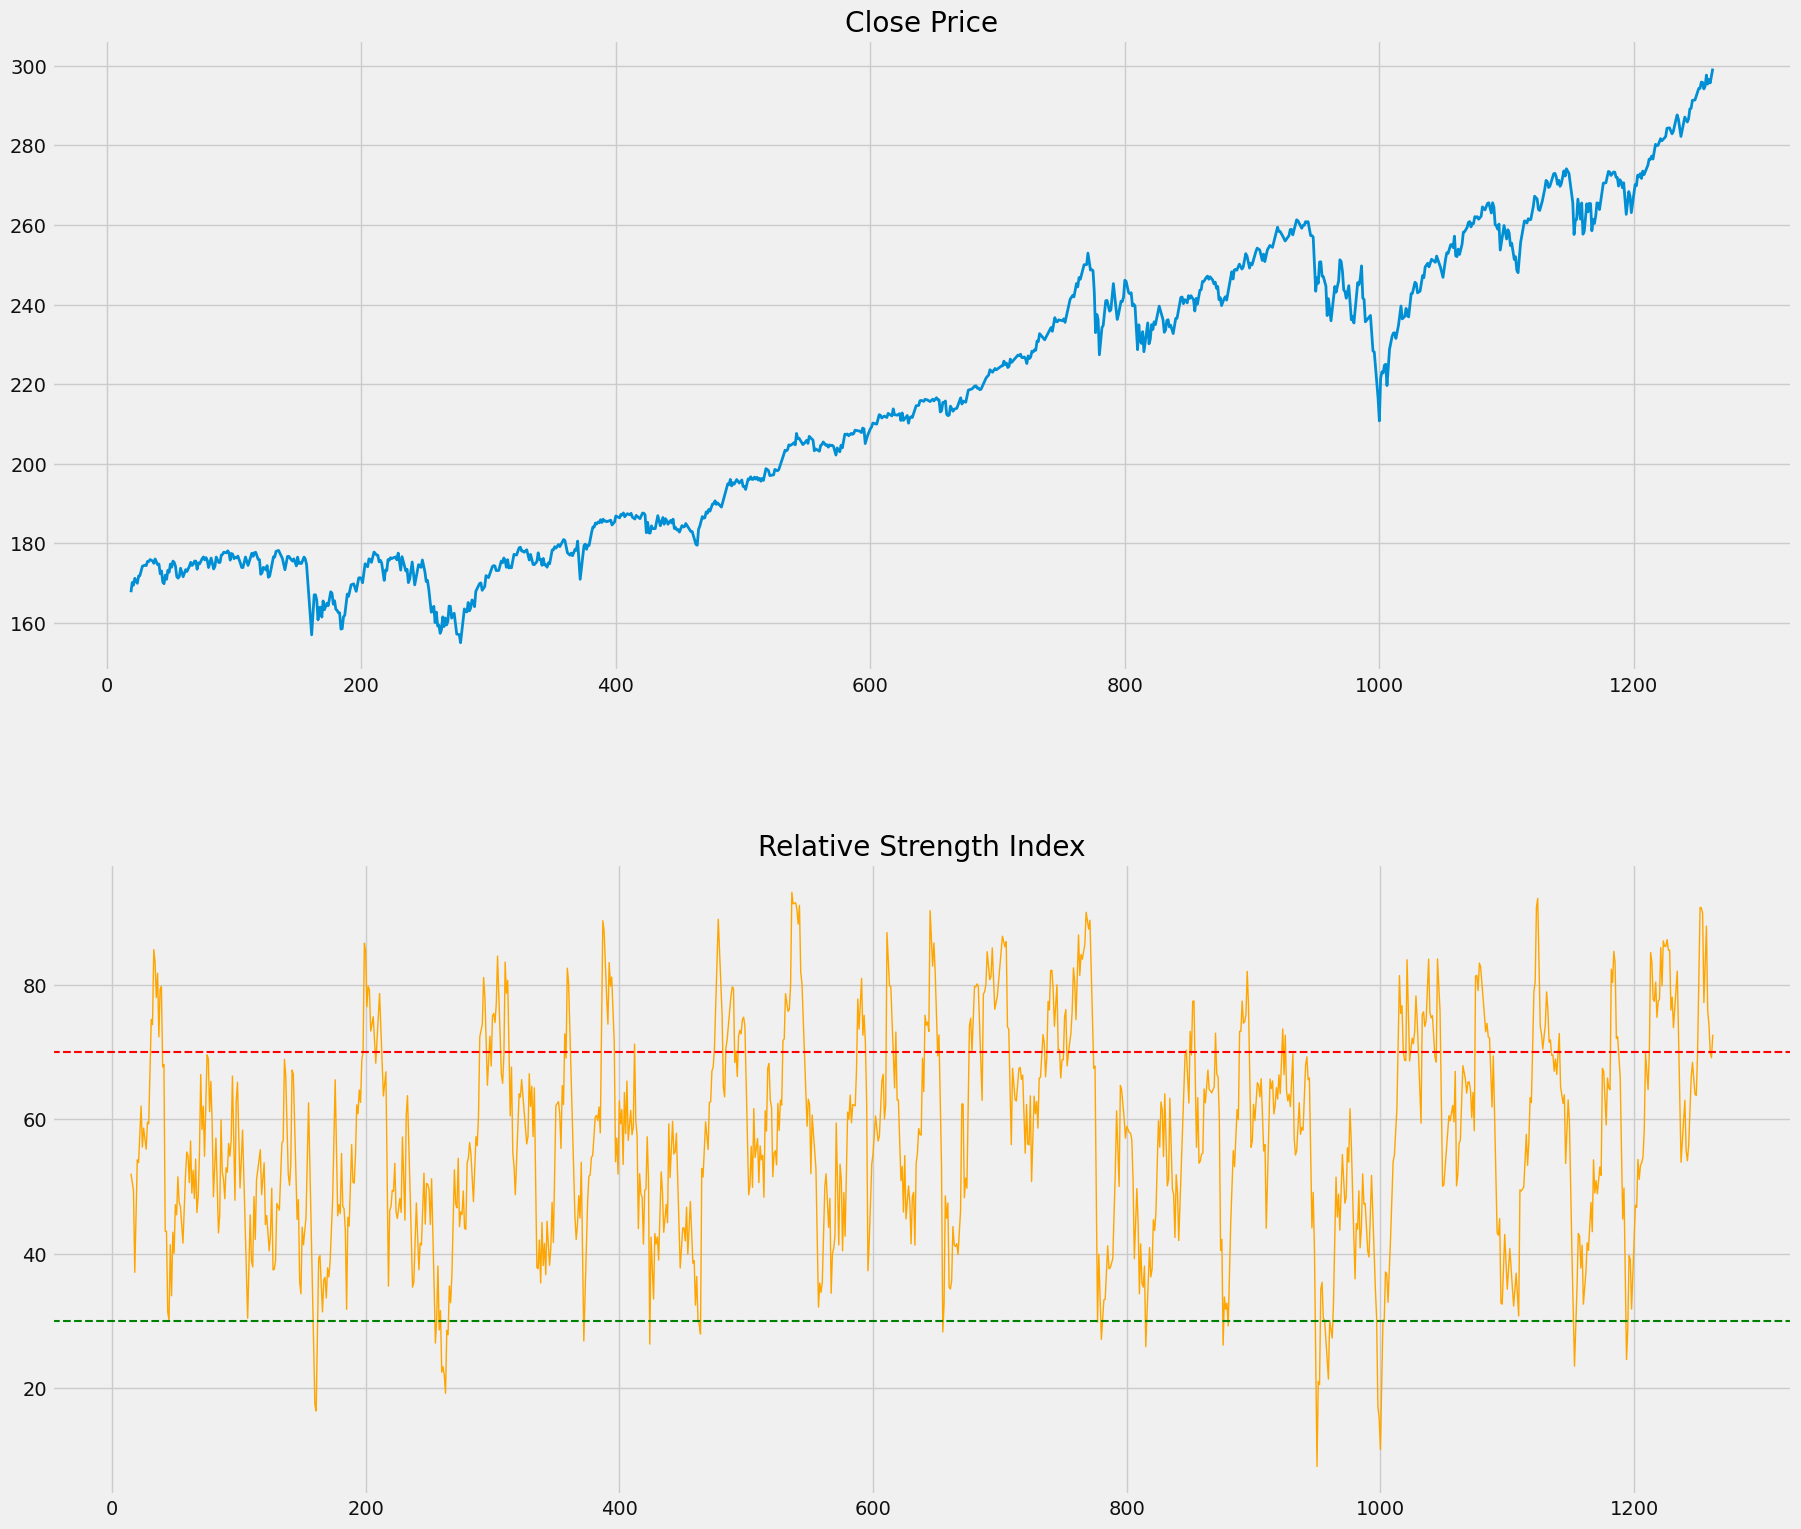

In [14]:
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df['Close'], linewidth=2)
ax1.set_title('Close Price')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

Next, create a dataframe X with columns: 'Open-Close', 'High-Low','VolumeChange', 'Rolmean', 'EWA', 'RSI'

In [15]:

X= df[['Open-Close','High-Low','VolumeChange','Rolmean',"EWA",'RSI']]
X.head(5)

Price,Open-Close,High-Low,VolumeChange,Rolmean,EWA,RSI
19,-1.552849,3.462778,-0.175101,168.079316,167.918901,45.534637
20,-1.527938,1.909929,-0.238458,168.208862,168.126598,53.994973
21,-0.116256,1.552862,0.081262,168.384908,168.252823,53.584314
22,-1.046303,1.270515,-0.270675,168.543100,168.529942,59.240899
23,0.838703,1.926541,0.282980,168.528571,168.735599,62.008357


<h4> Classification

Comparing yesterday’s closing price to today’s closing price defines past returns, whereas comparing today’s closing price to tomorrow’s closing price defines a tradable prediction target. Then, we define the trading signal y as follows: if tomorrow’s closing price is higher than today’s closing price, then y=1; otherwise, y=−1.

Note that RandomForest does not accept a pandas DataFrame as the target variable y. The target must be provided as a one-dimensional NumPy array (or an equivalent 1D structure), not as a DataFrame.

In [16]:
# Target: today -> tomorrow
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

#we remove the last line because, .shift(-1) make it artificial
X2 = X[:-1]
y2 = y[:-1]
print(X2)

Price  Open-Close  High-Low  VolumeChange     Rolmean         EWA        RSI
19      -1.552849  3.462778     -0.175101  168.079316  167.918901  45.534637
20      -1.527938  1.909929     -0.238458  168.208862  168.126598  53.994973
21      -0.116256  1.552862      0.081262  168.384908  168.252823  53.584314
22      -1.046303  1.270515     -0.270675  168.543100  168.529942  59.240899
23       0.838703  1.926541      0.282980  168.528571  168.735599  62.008357
...           ...       ...           ...         ...         ...        ...
1257    -1.218751  2.162632      0.036335  291.056129  291.728944  88.790728
1258    -1.145454  2.327571      0.313747  291.627657  292.082825  76.222074
1259    -2.886567  3.088168     -0.283823  292.230011  292.510353  74.134012
1260     0.265725  1.191289     -0.272353  292.660727  292.817749  69.981248
1261    -1.383718  2.849877      0.686471  293.215385  293.245977  69.186577

[1243 rows x 6 columns]


Split the data set into training data X_train,
y_train and test data X_test, y_test.

In [23]:

# fill in below
# Splitting the dataset

split_percentage = 0.8
split = int(split_percentage*len(df))


# fill in below
# Splitting the dataset

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=41)

X_train = X2[:split]
y_train = y2[:split]

X_test = X2[split:]
y_test = y2[split:]


X_train = X2[:split]
y_train = y2[:split]

X_test = X2[split:]
y_test = y2[split:]


Compute the hit rates and confusion matrices using KNeighborsClassifier(), LogisticRegression(), SVC and RandomForestClassifier. 
Print the hit rates and confusion matrices. 

In [24]:
# Create the (parametrised) models
models = [
    ("KNN", KNeighborsClassifier()),
    ("LR", LogisticRegression(max_iter=200)),
    ("RSVM", SVC(C=1_000_000.0, gamma=0.0001, kernel='rbf', tol=0.001)),
    ("RF", RandomForestClassifier(
        n_estimators=1000, max_depth=5, min_samples_leaf=30,
        bootstrap=True, n_jobs=1, random_state=0
    ))
]
print("Hit Rates / Confusion Matrices:\n")

Hit Rates / Confusion Matrices:



KNN:
0.560


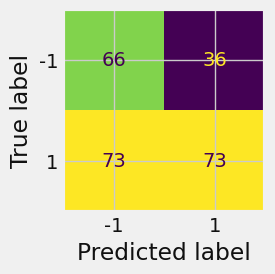

LR:
0.536


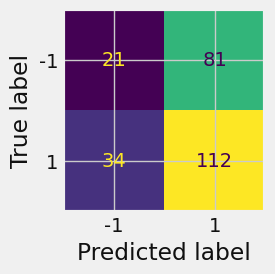

RSVM:
0.464


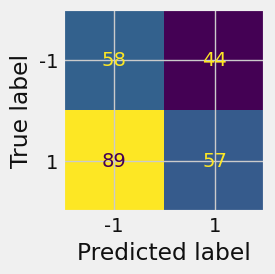

RF:
0.528


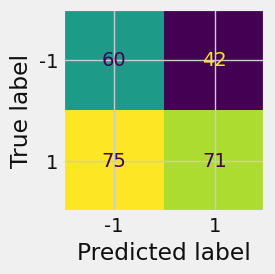

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(f"{name}:\n{model.score(X_test, y_test):.3f}")

    cm = confusion_matrix(y_test, pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot(ax=ax, colorbar=False) 
    plt.show()


Analyze and compare the confusion matrices obtained from each model.

The KNN model is essentially blind to half of the bullish marke because the false negative are equal to the true positive. However, the relatively low number of False Positives (36) suggests that when the model does commit to a "Rise" signal, it has decent reliability.

The Logistic Regression model is excellent at capturing bullish move but the accuracy isn't great

The RSVM accuracy is not good.

The RF confusion matrices show that the model often predict bearish days while the market is moving up.


We are interested in knowing what features were the most important. How would comment the result below?

In [20]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.1842106 , 0.17752657, 0.19662949, 0.1224527 , 0.12390758,
       0.19527306])

We still have one step. Choose one of the classifiers. Fit the model, compute and print the accuracy score for train data and test data. Comment the result. 

In [21]:
# Instantiate KNN learning model(k=15)
#classif = KNeighborsClassifier(n_neighbors=15)

#classif = LogisticRegression()

classif = RandomForestClassifier(
          min_samples_leaf=30,
           bootstrap=True, oob_score=False, n_jobs=1,
           random_state=None, verbose=0)

# classif = SVC(
#                     C=1000000.0, cache_size=200, class_weight=None,
#                       coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
#                       max_iter=-1, probability=False, random_state=None,
#                       shrinking=True, tol=0.001, verbose=False)

# fit the model
classif.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, classif.predict(X_train))
accuracy_test = accuracy_score(y_test, classif.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)



Train_data Accuracy: 0.66
Test_data Accuracy: 0.54


This is an important result. What does it tell to you about the accuracy, prediction power, and overfitting?
The accuracy on the training data are much larger than on the test data which mean that our model overfit a lot and this is the case for the 4 model.

Finally, we plot two figures. In the first, the predicted signal is indicated by a dot, since the model predicts only the direction of the price movement, not its magnitude.

In [26]:
df['Predicted_Signal'] = np.nan
pred_test = classif.predict(X_test)
df.loc[df.index[split:split+len(pred_test)], 'Predicted_Signal'] = pred_test


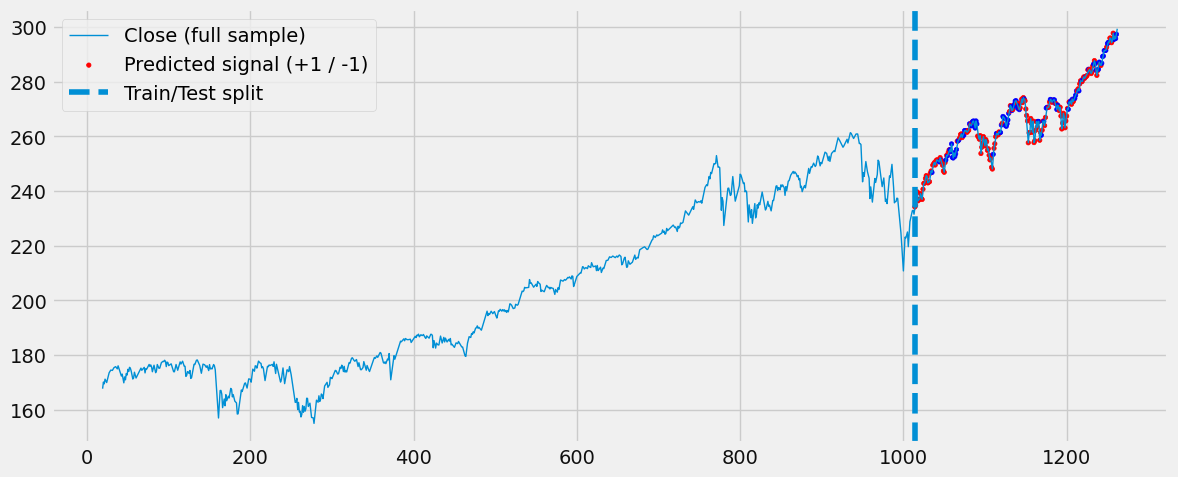

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close (full sample)', linewidth=1)

# Visualize signal as colored markers (test period only)
signal_idx = df['Predicted_Signal'].notna()
plt.scatter(df.index[signal_idx],
            df['Close'][signal_idx],
            c=df['Predicted_Signal'][signal_idx],
            cmap='bwr', s=10, label='Predicted signal (+1 / -1)')

plt.axvline(df.index[split], linestyle='--', label='Train/Test split')
plt.legend()
plt.tight_layout()
plt.show()

Although the figure may initially look good, it is misleading. To assess directional forecasting performance, we plot the cumulative net prediction error, assigning +1 to correct predictions and −1 to incorrect ones.Based on the picture, how would you describe the performance of our prediction process? What could be the reason?

our prediction process is wrong because the error only get bigger with the accumulation of error so the prediction has a huge gap at the end.

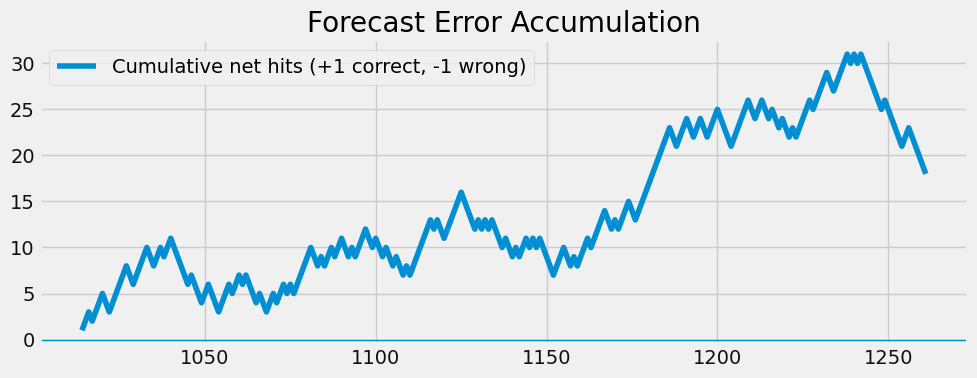

In [ ]:
# only forecast period 
mask = df['Predicted_Signal'].notna()

y_true = y[mask.values]                     # true labels aligned to df rows
y_pred = df.loc[mask, 'Predicted_Signal'].to_numpy()

correct = (y_pred == y_true).astype(int)    
net_hits = 2*correct - 1                    # +1 correct, -1 wrong

cum_net_hits = np.cumsum(net_hits)

plt.figure(figsize=(10,4))
plt.plot(df.index[mask], cum_net_hits, label='Cumulative net hits (+1 correct, -1 wrong)')
plt.axhline(0, linewidth=1)
plt.title('Forecast Error Accumulation')
plt.legend()
plt.tight_layout()
plt.show()

Now change the classifier and rerun the final step to regenerate the plots.
